<a href="https://colab.research.google.com/github/seys-fing/scripts/blob/master/seys_06_moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este ejemplo muestra que la media movil tiene el efecto de un pasabajos.
Aplicaremos los filtros 

$$h[n]=\frac{1}{4}\delta[n]+\frac{1}{2}\delta[n-1]+\frac{1}{4}\delta[n-2]$$ 

y

$$h[n]=\sum_{m=0}^{N-1} \frac{1}{N}\delta[n-m]$$ donde el indice $m$ parte de cero para que el filtro sea causal, aunque como fue visto en clase, retrasar en el tiempo no cambia el módulo de la transferencia.

Si bien este filtro solo promedia las muestras, uno puede modificarlo agregando pesos y ajustando el largo. 

La primer celda, además de importar las librerías, abre un cuadro de dialogo para levantar al servidor un archivo .mp3 que ustedes tengan. 


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import librosa
import librosa.display
import IPython.display as ipd
from scipy import signal

uploaded = files.upload()



Saving HCTSun.mp3 to HCTSun.mp3


En las dos primeras líneas de la siguiente celda deben escribir el nombre del archivo que hayan cargado. La primera deja escuchar el archivo y la segunda línea lo convierte en un array para poder trabajar en Python. Luego lo recortamos unos segundos de la canción para que el procesamiento sea más rápido, y escuchamos el segmento de audio que elegimos. 

In [0]:
audiof=ipd.Audio('HCTSun.mp3') # load a local WAV file
xcompleto, sr = librosa.load('HCTSun.mp3')

print(xcompleto.shape)
print(sr)
t=np.linspace(1000000,1500000,500000)
x=xcompleto[1000000:1500000]
ipd.Audio(x, rate=sr) # load a NumPy array



(4714896,)
22050


Finalmente definimos la respuesta al impulso, la convolucionamos con el segmento del audio en x, y le calculamos la DFT a la entrada y salida para compararlas.
Además escuchamos la salida.

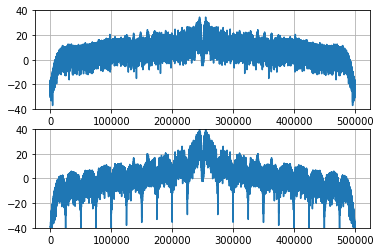

In [0]:
N=20
h=np.ones(N)/np.sqrt(N)
y=np.convolve(x,h)
#y=np.convolve(x,[1/4, 1/2, 1/4])

w=np.linspace(0,500000,500000)
fx=np.fft.fftshift(np.fft.fft(x))
fy=np.fft.fftshift(np.fft.fft(y))
fy=fy[0:500000]

plt.subplot(2,1,1)
plt.plot(w ,10*np.log10(np.abs(fx)))
plt.ylim(-40,40)
plt.grid()
plt.subplot(2,1,2)
plt.plot(w ,10*np.log10(np.abs(fy)))
plt.ylim(-40,40)
plt.grid()

ipd.Audio(y, rate=sr) # load a NumPy array



y comparamos las señales en el tiempo

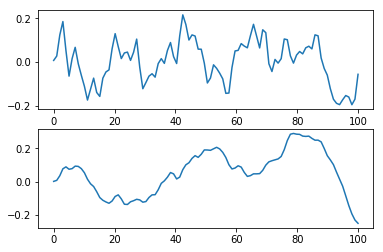

In [0]:
t=np.linspace(0,100,100)
plt.subplot(2,1,1)
plt.plot(t,x[0:100])
plt.subplot(2,1,2)
plt.plot(t,y[0:100])